**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree, DistanceMetric
from sklearn.metrics import accuracy_score, pairwise_distances

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [22]:
class MyKNeighborsClassifier(BaseEstimator):    
    def __init__(self, n_neighbors, algorithm = 'brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        
    def fit(self, X, y):
        self.numclasses = len(np.unique(y))
        self.trainSetClassification = y
        if self.algorithm == 'brute':
            self.X_train = X
        elif self.algorithm == 'kd_tree':
            self.X_train_tree = KDTree(X)    
        
    def predict(self, X):
        if self.algorithm == 'brute':
            return np.apply_along_axis(np.bincount,1,self.trainSetClassification[np.argpartition(pairwise_distances(X, self.X_train, metric = self.metric), self.n_neighbors, axis = 1)[:,:self.n_neighbors]], minlength = self.numclasses).argmax(axis=1)        
        if self.algorithm == 'kd_tree':
            return np.apply_along_axis(np.bincount, 1, self.trainSetClassification[self.X_train_tree.query(X, k = self.n_neighbors)[1]], minlength = self.numclasses).argmax(axis = 1)
        
    def score(self,X,y):
        return accuracy_score(y,self.predict(X))
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [23]:
iris = datasets.load_iris()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
#print(y_train)

In [25]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [26]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [27]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [28]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [29]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [30]:
%time clf.predict(X_test)

Wall time: 2 ms


array([1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])

In [31]:
%time my_clf.predict(X_test)

Wall time: 1 ms


array([1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [32]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [34]:
%time clf.fit(X_train, y_train)

Wall time: 51 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [35]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [36]:
%time clf.predict(X_test)

Wall time: 2 ms


array([2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2])

In [37]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2], dtype=int64)

In [38]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [39]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [40]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [41]:
vectorizer = CountVectorizer(max_features = 20000,stop_words=ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [42]:
cross_val_score(MyKNeighborsClassifier(n_neighbors = 2), X, target, cv=3)

array([0.22985154, 0.21267568, 0.2283214 ])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [45]:
def find_optimum_k():
    best_k = 1
    best_res = 0
    for k in range(1, 11):
        res = np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors=k), X, target, cv=3))
        if res > best_res:
            best_k = k
            best_res = res
    return best_k

In [46]:
find_optimum_k()

1

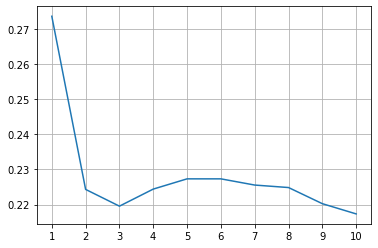

In [48]:
res = [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i), X, target, cv=3)) for i in range(1,11)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
plt.xticks(range(1, 11))
ax.plot(range(1, 11),res)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

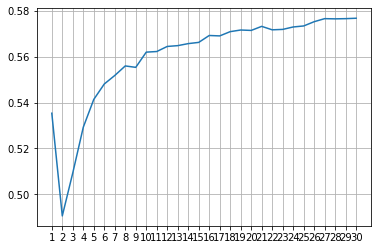

In [52]:
res = [np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors=i, metric = 'cosine'), X, target, cv=3)) for i in range(1,31)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
plt.xticks(range(1, 31))
ax.plot(range(1, 31),res)

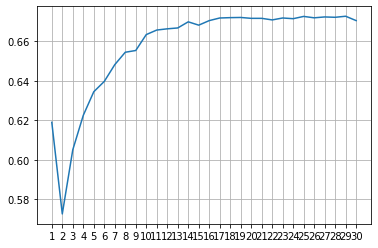

In [54]:
vectorizer = TfidfVectorizer(max_features = 20000,stop_words=ENGLISH_STOP_WORDS)
X_tfidf = vectorizer.fit_transform(data)

res = [np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors=i, metric = 'cosine'), X_tfidf, target, cv=3)) for i in range(1,31)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
plt.xticks(range(1, 31))
ax.plot(range(1, 31),res)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [57]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

data = newsgroups['data']
target = newsgroups['target']


vectorizer = TfidfVectorizer(max_features = 20000,stop_words=ENGLISH_STOP_WORDS)
X_tfidf = vectorizer.fit_transform(data)


Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [59]:
np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors=24, metric = 'cosine'), X_tfidf, target, cv=3))

0.656797845125538

In [ ]:
    Наилучший результат наблюдается на косинусной метрике в совокупности TF-IDF векторизацией. Это скорее всего связано с тем, 
что вышеуказанная векторизация определяет вес слова прямопропорционально частоте вхождения слова в документ и обратно
пропорционально частоте его вхождения в другие документы, что позволяет нам выделять значимые и уникальные слова для конкретно
взятого документа. 
    Точность на тестовой выборке немного меньше, чем на кросс-валидации. Скорее всего это связано со спецификой тестовой выборки
(тк по фолдам мы все-таки берем усредненное значение)